# 1. MNIST

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

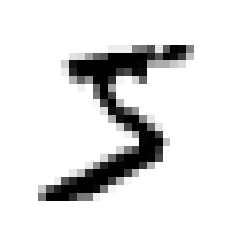

In [20]:
first_digit = X.iloc[0]
first_digit_image = first_digit.values.reshape(28, 28)

plt.imshow(first_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [17]:
y[0]

'5'

In [18]:
y = y.astype(np.uint8)

## 1.1 Train and Test set split

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 2. Training a Binary Classifier

In [22]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=21)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=21)

In [24]:
sgd_clf.predict([first_digit])

array([ True])

# 3. Performance Measures

## 3.1 Accuracy using Cross-Validation
* Accuracy metric is dumb if your data labels balance is different
* Cross-validation sets also should implement Stratifies Sampling
* However, It is not necessary for Random Forest or Ensemble models

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,shuffle=True, random_state=21)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = (y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9649, 0.9674, 0.9583])

## 3.2 Confusion Matrix

In [29]:
from sklearn.model_selection import cross_val_predict

#Cross_val_score => returns evaluation scores in Regression
#cross_val_predict => returnspredictions made in each fold in Classification
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [30]:
from sklearn.metrics import confusion_matrix

#Row => actual class
#Column => predicted class
confusion_matrix(y_train_5, y_train_pred)

array([[53875,   704],
       [ 1484,  3937]], dtype=int64)

### 3.2.1 Precision
* Accuracy of positive predictions
* Predicting 1 whether it is correct or not

### 3.2.2 Recall
* Accuracy of positive actual classes
* Actually 1, but prediction is 0

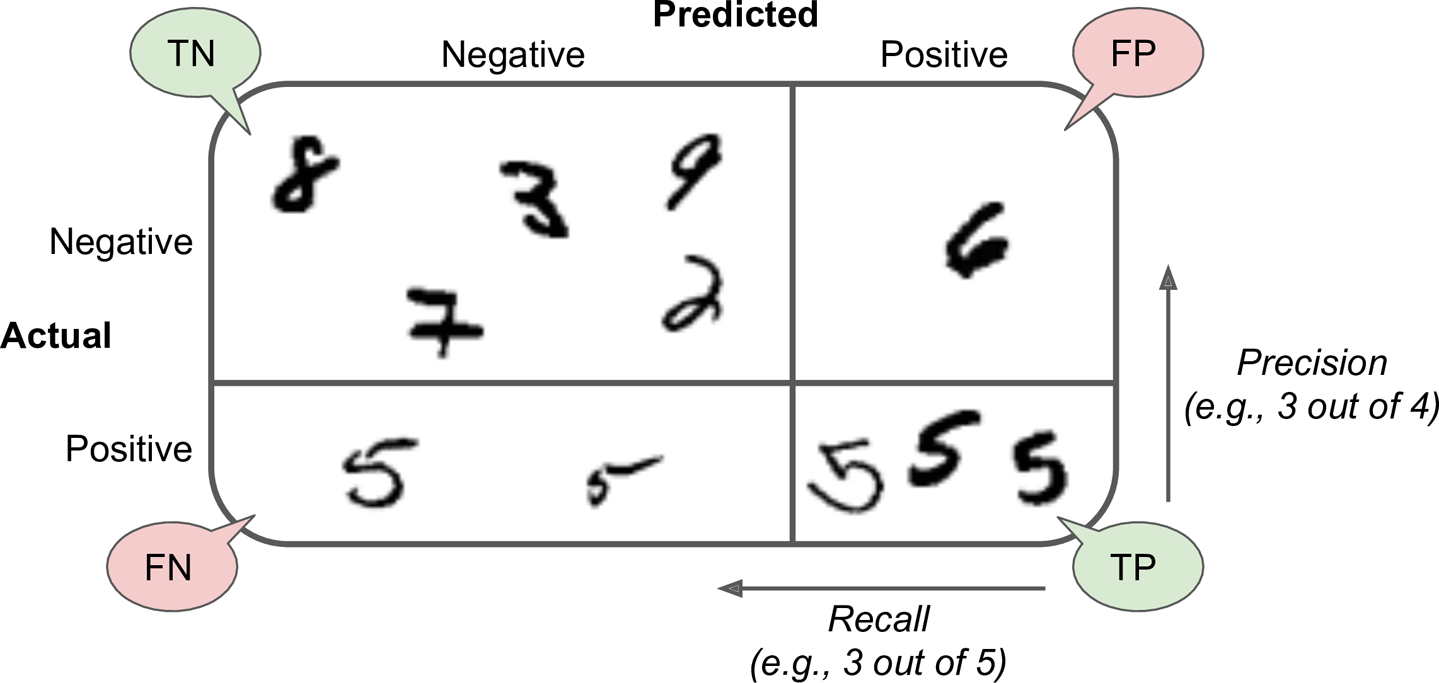

## 3.3 Precision and Recall

In [31]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))  #predicts that image is '5', 84%  => yangilarini bn ishlash
print(recall_score(y_train_5, y_train_pred))     #detects '5', 72% => borlar bn ishlash

0.8483085541909071
0.726249769415237


## 3.4 F1 Score

In [32]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7825482011528523

## 3.5 Precision/Recall Trade-off
* Bigger the threshold => higher precision, lower recall
* Smaller the threshold => higher recall, lower precision

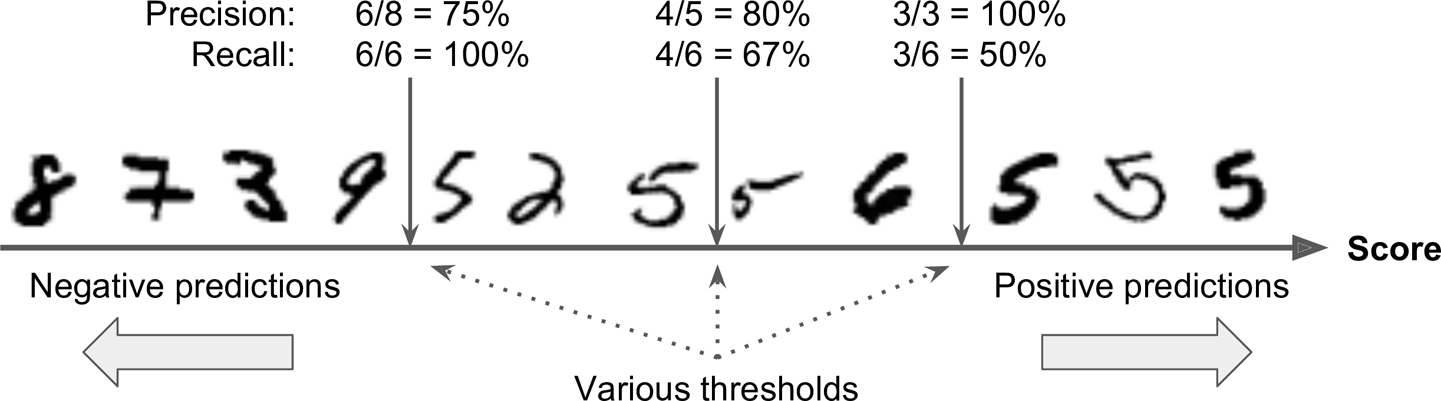

### 3.5.1 Threshold

In [33]:
#Returns decision scores only, instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, 
                             method='decision_function')

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

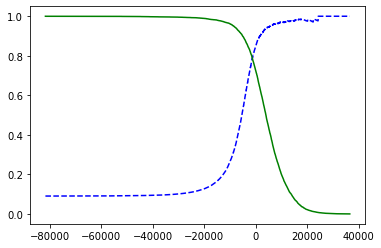

In [35]:
import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

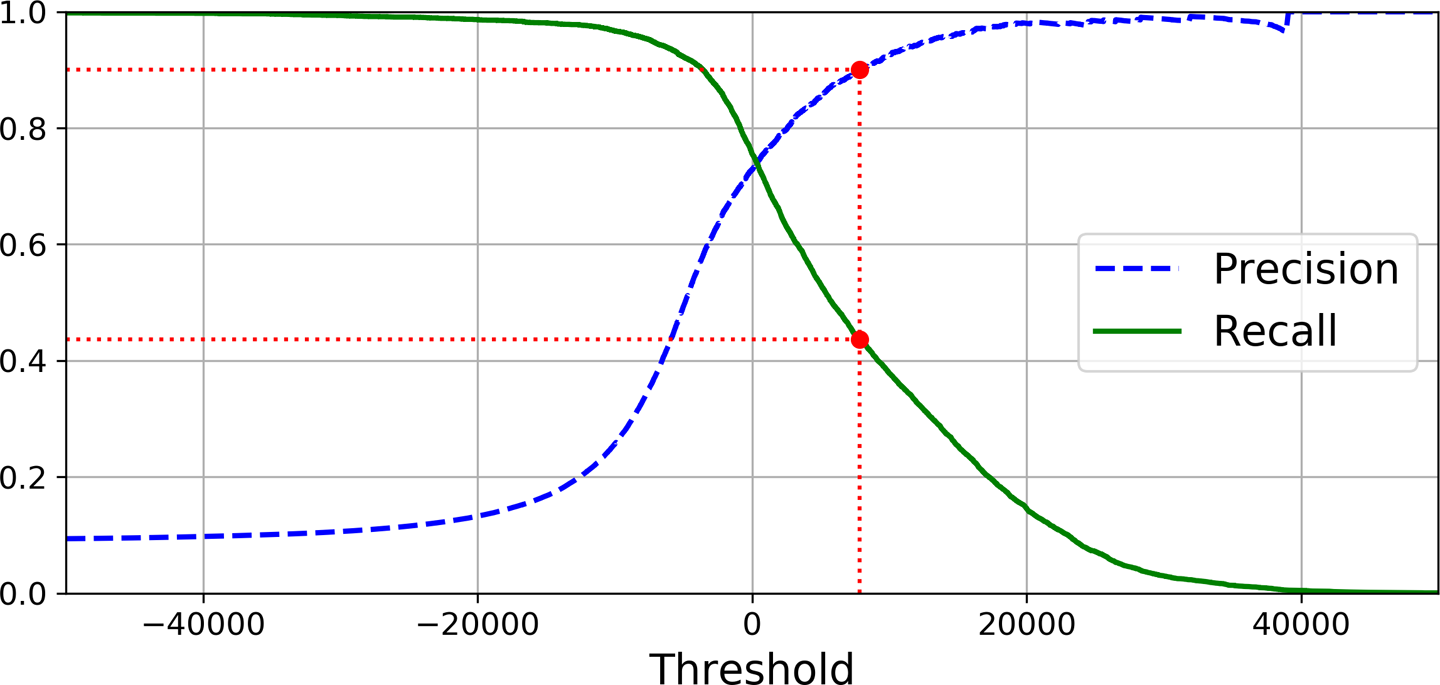

### 3.5.2 Precision against recall
* Alternative to threshold precision/recall trade-off

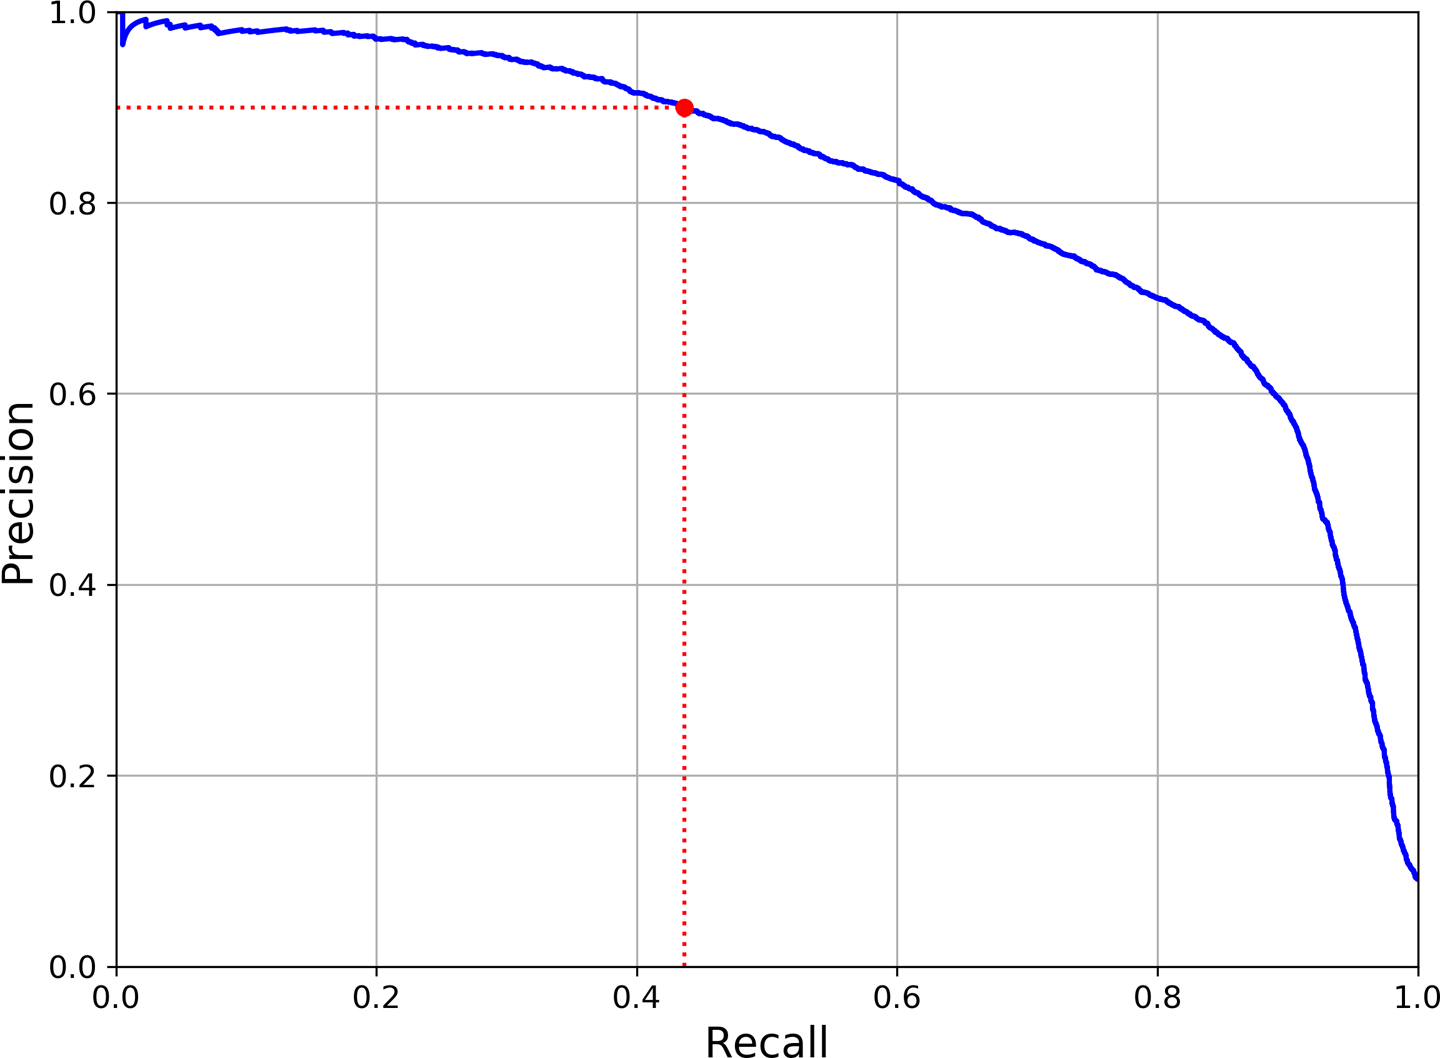

## 3.6 ROC Curve
* Binary classifiers only
* True positive rate (recall) against False positive rate

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

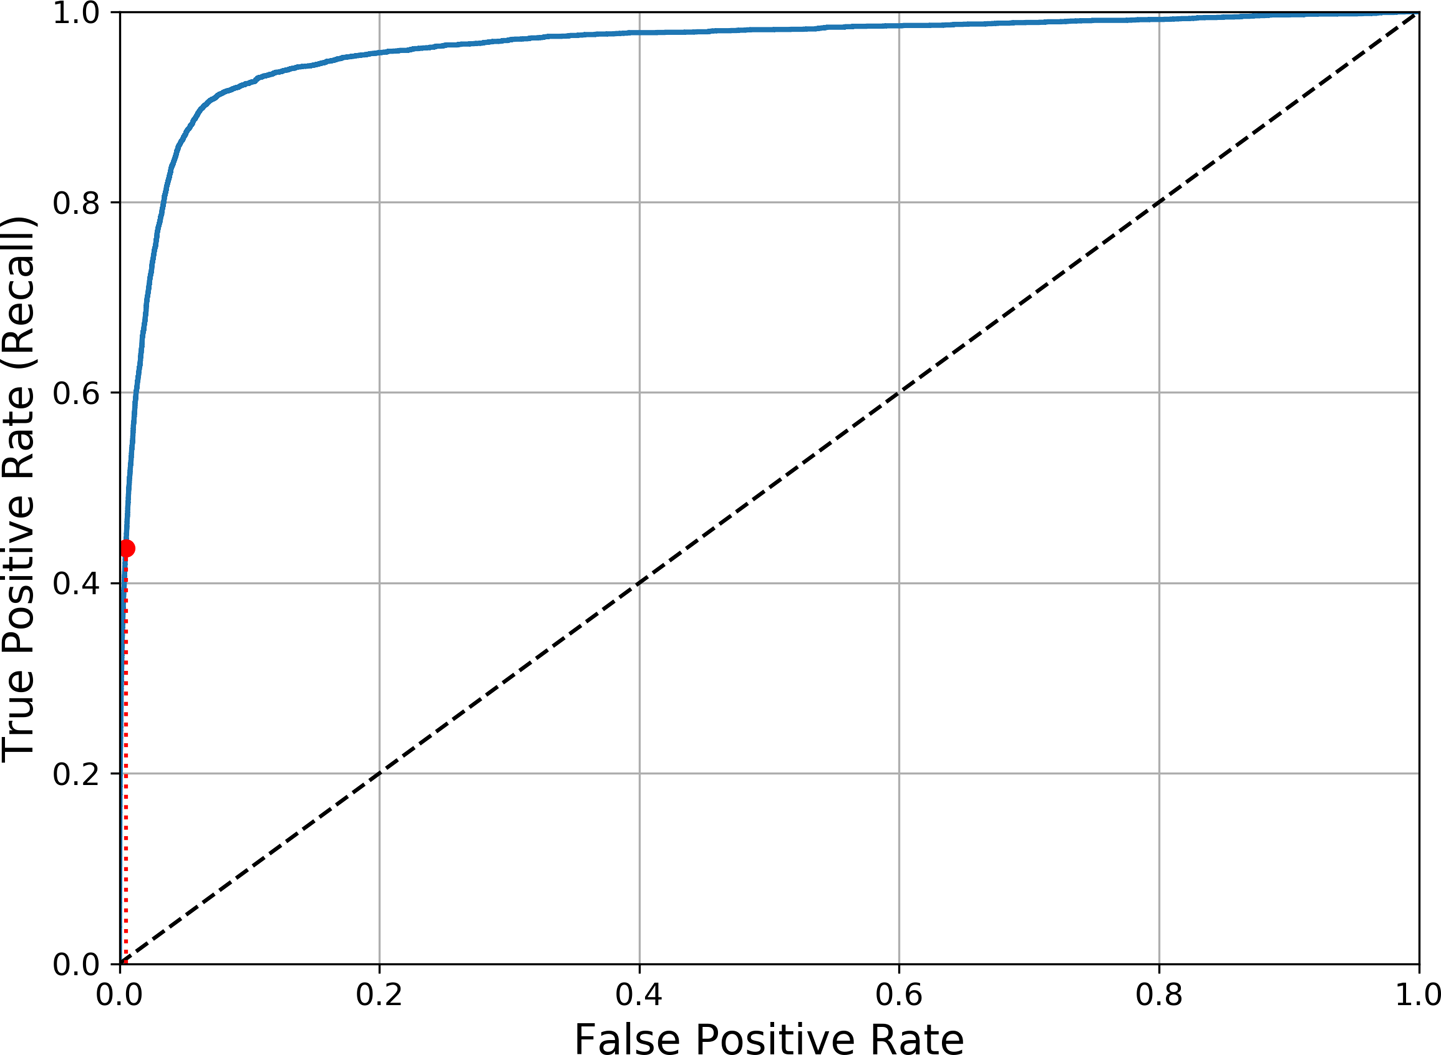

### 3.6.1 ROC-AUC
* Perfect classifier will have AUC score equal to 1

In [38]:
from sklearn.metrics import roc_auc_score

#SGD 96% area, blue dashed line
roc_auc_score(y_train_5, y_scores)

0.961572842871959

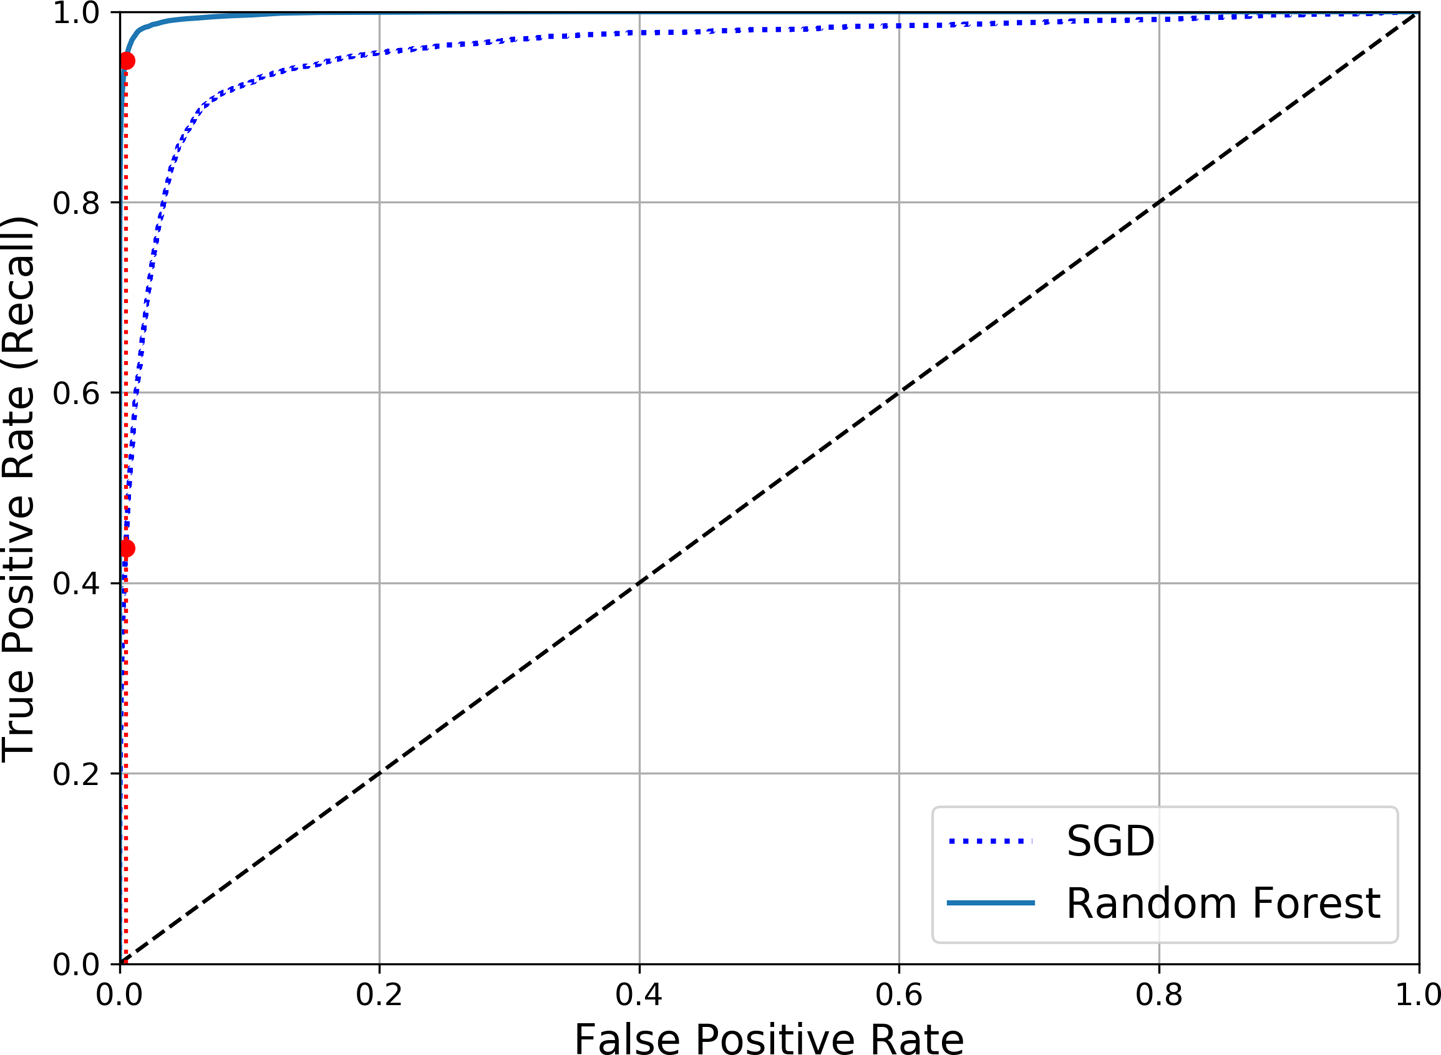

# 4. Multiclass Classification
* OvA (N trainings)
* OvO (SVM => less training) (Nx(N-1)/2)) training combinations

In [39]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)  #45 trainings
svm_clf.predict([first_digit])

array([5], dtype=uint8)

In [40]:
first_digit_scores = svm_clf.decision_function([first_digit])
first_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [41]:
np.argmax(first_digit_scores)

5

In [42]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#Scaling inputs only for numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# 5. Error Analysis

# 6. Multilabel Classification
* One instance, multiple classes
* E.g.: an image with 3-4 faces

# 7. Multioutput Classification
* multiple multilabel classification where each label can have multiple outputs